In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
mojo_df = pd.read_csv('data/bom.movie_gross.csv')
mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [45]:
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [36]:
mojo_df['studio'] = mojo_df['studio'].fillna('Unknown')

In [39]:
mojo_df['foreign_gross'] = mojo_df['foreign_gross'].str.replace(',', '').astype(float)

In [42]:
mojo_df['foreign_gross'] = mojo_df['foreign_gross'].fillna(0)

In [44]:
mojo_df['domestic_gross'] = mojo_df['domestic_gross'].fillna(0)

In [54]:
mojo_df = mojo_df[mojo_df['foreign_gross'] > 1000000]
mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3263,The Front Runner,Sony,2000000.0,1200000.0,2018
3265,Wildlife,IFC,1100000.0,2000000.0,2018
3268,Billionaire Boy's Club,VE,1300.0,2500000.0,2018
3271,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018


In [55]:
mojo_df = mojo_df[mojo_df['domestic_gross'] > 1000000]
mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3252,Papillon (2018),BST,2300000.0,2200000.0,2018
3257,Don't Worry He Won't Get Far on Foot,Amazon,1400000.0,2500000.0,2018
3258,A Private War,Aviron,1600000.0,2200000.0,2018
3263,The Front Runner,Sony,2000000.0,1200000.0,2018


In [58]:
mojo_df_top_foreign = mojo_df.sort_values('foreign_gross', ascending=False)

In [59]:
mojo_df_top_domestic = mojo_df.sort_values('domestic_gross', ascending=False)

In [64]:
mojo_df_top_25_foreign = mojo_df_top_foreign.iloc[:25]

In [67]:
mojo_df_top_25_domestic = mojo_df_top_domestic.iloc[:25]

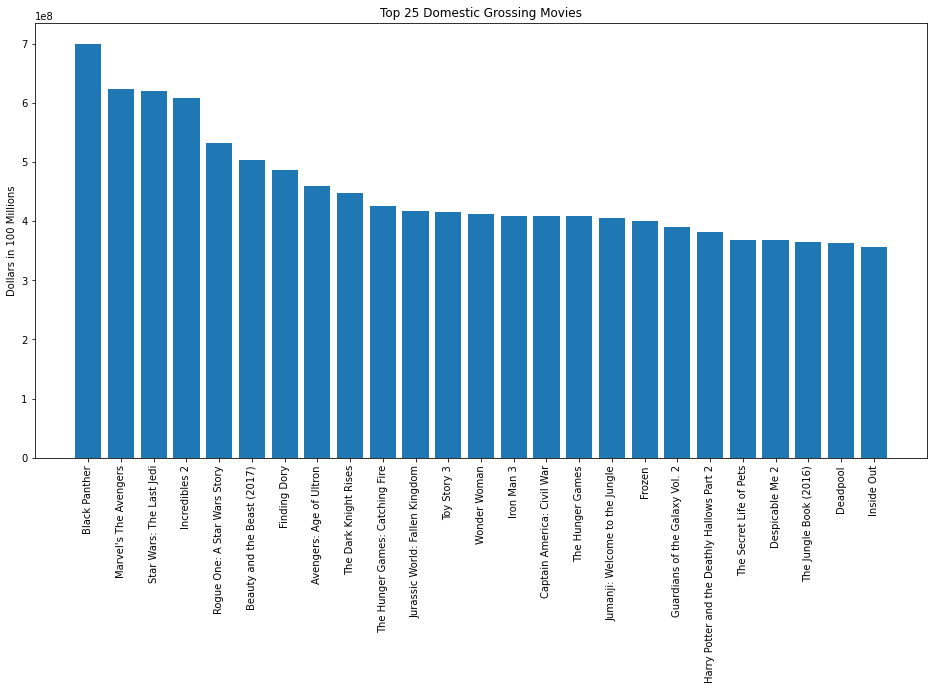

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot data
ax.bar(mojo_df_top_25_domestic['title'], mojo_df_top_25_domestic['domestic_gross'])

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Dollars in 100 Millions")
ax.set_title("Top 25 Domestic Grossing Movies");

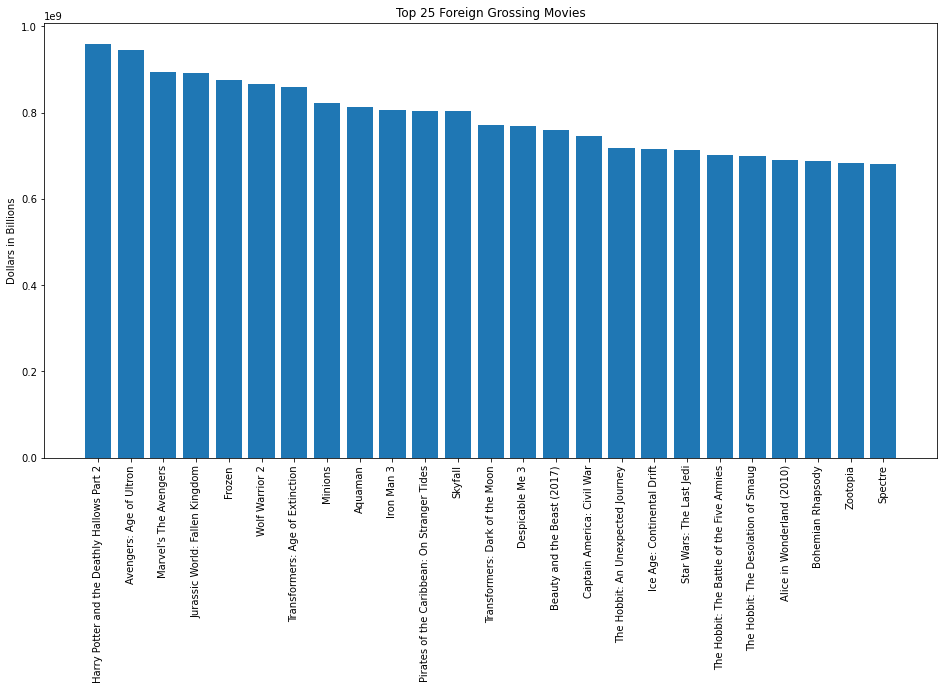

In [74]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot data
ax.bar(mojo_df_top_25_foreign['title'], mojo_df_top_25_foreign['foreign_gross'])

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Dollars in Billions")
ax.set_title("Top 25 Foreign Grossing Movies");

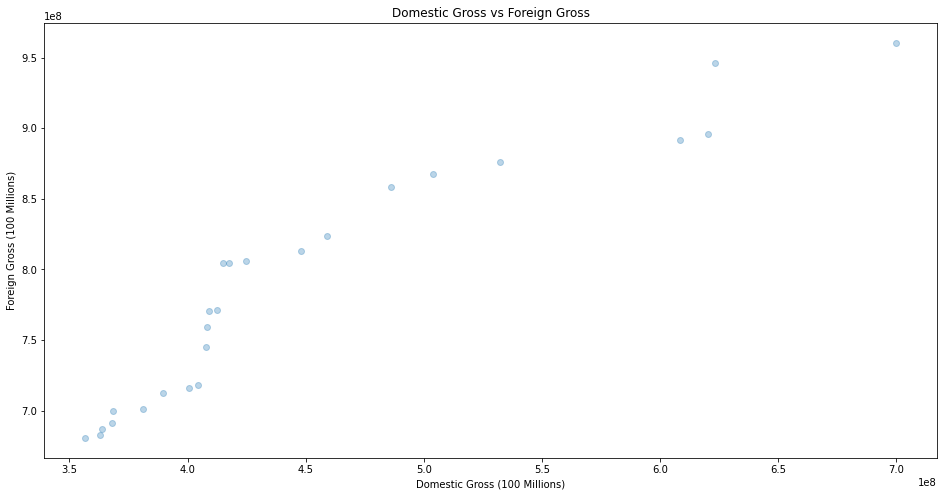

In [73]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=mojo_df_top_25_domestic['domestic_gross'],
    y=mojo_df_top_25_foreign['foreign_gross'],
    alpha=0.3
)

ax.set_xlabel("Domestic Gross (100 Millions)")
ax.set_ylabel("Foreign Gross (100 Millions)")
ax.set_title("Domestic Gross vs Foreign Gross");

In [75]:
mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3252,Papillon (2018),BST,2300000.0,2200000.0,2018
3257,Don't Worry He Won't Get Far on Foot,Amazon,1400000.0,2500000.0,2018
3258,A Private War,Aviron,1600000.0,2200000.0,2018
3263,The Front Runner,Sony,2000000.0,1200000.0,2018
